In [7]:
from hubersed.paths import PATHS
import pickle
import matplotlib.pyplot as plt
import numpy as np

from spender.data import desi
from hubersed.style import *

DATA_PATH = PATHS['DATA']
RESULTS_PATH = PATHS['RESULTS']

In [2]:
inst = desi.DESI()
wave_obs = inst.wave_obs

In [3]:
wave_obs

tensor([3600.0000, 3600.8000, 3601.6000,  ..., 9822.4000, 9823.2000,
        9824.0000], dtype=torch.float64)

In [4]:
save_path = DATA_PATH / f'DESIprospector1024_{45}.pkl'

with open(save_path, 'rb') as f:
    spec, w, z, target_id,  norm, zerr = pickle.load(f)

In [5]:
with open('/Users/ng27753/Astronomy_Research/spender/DATA/DESIchunk1024_7.pkl', 'rb') as f:
    desi_spec, desi_w, desi_z, desi_target_id,  desi_norm, desi_zerr = pickle.load(f)

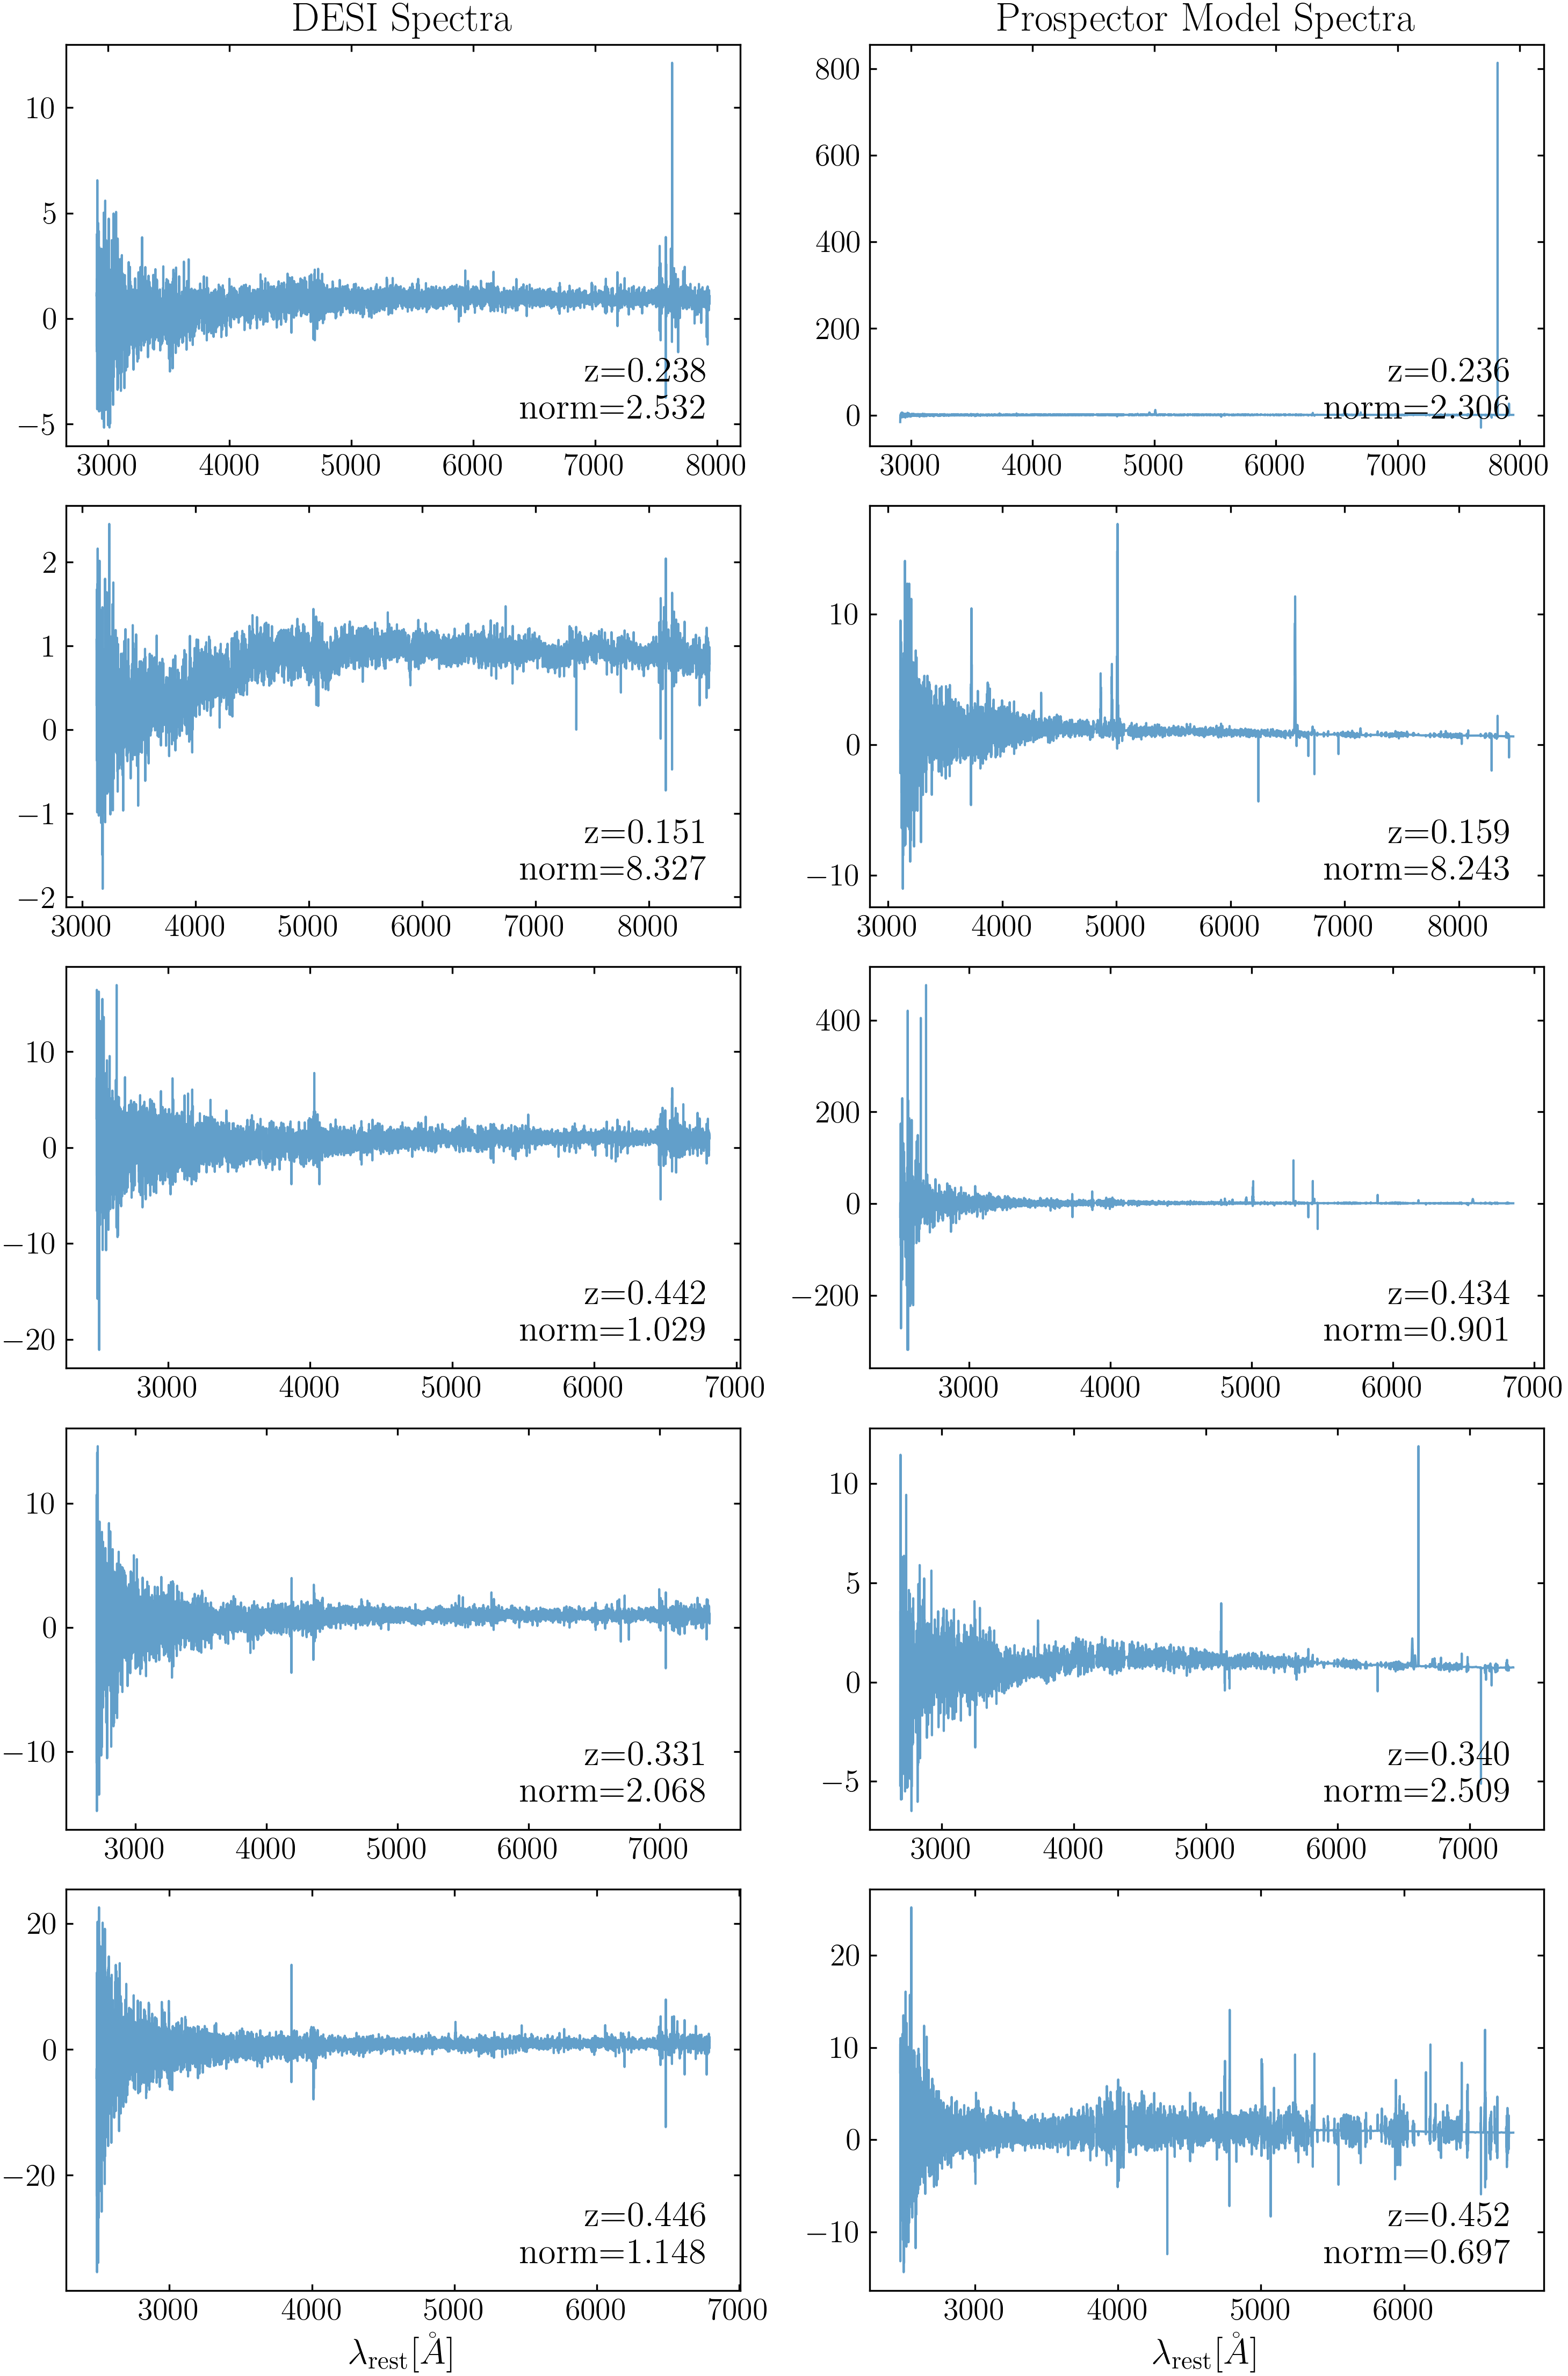

In [9]:
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
ax = ax.flatten()

for i in range(5):
    # get one desi spectrum, with z and norm
    desi_spec_i = desi_spec[i]
    desi_z_i = desi_z[i]
    desi_norm_i = desi_norm[i]

    # mask a model sed within z to 0.01 of prospector z and norm of 0.5
    mask = (z > desi_z_i - 0.01) & (z < desi_z_i + 0.01) & (norm > desi_norm_i - 0.5) & (norm < desi_norm_i + 0.5)
    model_spec_i = spec[mask][0]
    model_w_i = w[mask][0]
    model_z_i = z[mask][0]
    model_norm_i = norm[mask][0]

    # even desi spectrum to rest frame
    wave_rest_desi = wave_obs / (1 + desi_z_i)
    ax[2*i].plot(wave_rest_desi, desi_spec_i, label='DESI', alpha=0.7)
    # text at bottom right with z and norm
    ax[2*i].text(0.95, 0.05, f'z={desi_z_i:.3f}\nnorm={desi_norm_i:.3f}', transform=ax[2*i].transAxes,
                 verticalalignment='bottom', horizontalalignment='right', fontsize=16)

    # even model spectrum to rest frame
    wave_rest_model = wave_obs[:-1] / (1 + model_z_i)
    ax[2*i + 1].plot(wave_rest_model, model_spec_i, label='Prospector', alpha=0.7)
    # text at bottom right with z and norm
    ax[2*i + 1].text(0.95, 0.05, f'z={model_z_i:.3f}\nnorm={model_norm_i:.3f}', transform=ax[2*i + 1].transAxes,
                     verticalalignment='bottom', horizontalalignment='right', fontsize=16)

ax[0].set_title('DESI Spectra', fontsize=18)
ax[1].set_title('Prospector Model Spectra', fontsize=18)

ax[-1].set_xlabel(r'$\lambda_{\rm {rest}} [\AA]$', fontsize=16)
ax[-2].set_xlabel(r'$\lambda_{\rm {rest}} [\AA]$', fontsize=16)

# tick size
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
fig.savefig(RESULTS_PATH / 'desi_vs_prospector_spectra.pdf', dpi=300)